In [1]:
import pandas as pd
import numpy as np
import csv
import os
import sys
import matplotlib.pyplot as plt

## raw combined maf: all patients, samples, clones, mutations

In [33]:
def number_by_cluster_less_col(input_mut_ccfs):
    input_mut_ccfs_less_col = input_mut_ccfs.iloc[:,0:22]
    input_mut_ccfs_less_col.drop(columns=['Sample_Alias'],inplace=True)

    clust_num_list = []
    for index, row in input_mut_ccfs_less_col.iterrows():
        pat_clust_num = str(row['Patient_ID']) + "_" + str(row['Cluster_Assignment'])
        clust_num_list.append(pat_clust_num)

    input_mut_ccfs_less_col['Tumor_Sample_Barcode'] = clust_num_list

    return input_mut_ccfs_less_col

In [13]:
def number_by_cluster(input_mut_ccfs):
    input_mut_ccfs_new_col = input_mut_ccfs.copy()
    clust_num_list = []
    for index, row in input_mut_ccfs_new_col.iterrows():
        pat_clust_num = str(row['Patient_ID']) + "_CL" + str(row['Cluster_Assignment'])
        clust_num_list.append(pat_clust_num)

    input_mut_ccfs_new_col['Tumor_Sample_Barcode'] = clust_num_list

    return input_mut_ccfs_new_col

## input from extended data table

In [2]:
pat_1598 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1598_new_pon_results/1598.mut_ccfs.txt", sep='\t')

pat_1078 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1078_new_pon_results/1078.mut_ccfs.txt", sep='\t')

pat_1326 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1326_firecloud_phylo/1326_cfDNA_high_purity.mut_ccfs.txt", sep='\t')
pat_1644 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1644_passed_muts_results/1644.mut_ccfs.txt", sep='\t')

pat_2819 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2819_passed_muts_results/2819.mut_ccfs.txt", sep='\t',
                      low_memory=False)
pat_2389 = pd.read_csv("/Users/lmartin/Documents/2023/2389_multiple_6_bl_tree_0515/2389_multiple_6_bl_tree_v1/2389_multiple_6.mut_ccfs.txt", sep='\t',
                      low_memory=False)

pat_2974 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2974_new_pon_results/2974.mut_ccfs.txt", sep='\t')

pat_1035 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1035_with_indel/1035.mut_ccfs.txt", sep='\t')

pat_1002 = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1002_pre_post_updated/1002_with_pre_post.mut_ccfs.txt',sep='\t',
                          low_memory=False)
pat_1534 = pd.read_csv('~/Documents/2024/RA_1534_vm_new_bams/RA_1534_bl_TBX/1534_bl_TBX/1534.mut_ccfs.txt',sep='\t')

pat_1547 = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1547_0915/1547_newer_bl_tree/1547.mut_ccfs.txt',sep='\t',
                          low_memory=False)

pat_1558 = pd.read_csv('~/Documents/2023/RA_1558_fix_pies/take_3/1558_fix_pies_v3/1558.mut_ccfs.txt',sep='\t')

#pat_2542 = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_high_purity_v6_morebl_moreiter_results/2542_high_purity_v6_morebl_moreiter.mut_ccfs.txt',sep='\t')
pat_2542 = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_hapaseg_results_v6/2542_hapaseg_kristy_tool_v6.mut_ccfs.txt',sep='\t')

pat_1045 = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1045_vm_phylo_results/1045.mut_ccfs.txt",sep='\t',low_memory=False)

pat_1113 =pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1113_vm_phylo_results/1113.mut_ccfs.txt",sep='\t')

pats_list = [pat_1002, pat_1547, pat_1598, pat_1078, pat_1045, pat_1113, pat_2389,
            pat_1326, pat_1644, pat_2819, pat_2974, pat_1035, pat_1534, pat_1558, pat_2542]

In [3]:
combined_maf_v2 = pd.concat(pats_list)
combined_maf_v2=combined_maf_v2.iloc[:,0:22]

In [4]:
def filter_junk(input_df):

    ## remove junk mutations that show as hits
    filtered_df = input_df[input_df['Hugo_Symbol'] != 'GIMAP6']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'OC90']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'TNIK']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'MLXIPL']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'KIF19']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'LCN9']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'CGRRF1']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'PTCH2']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'DNAJB14']
    filtered_df = filtered_df[filtered_df['Hugo_Symbol'] != 'PRR14']
    
    
    return filtered_df

In [5]:
combined_maf_v2=filter_junk(combined_maf_v2)
list(combined_maf_v2['Patient_ID'].unique())

['1002_with_pre_post',
 1547,
 1598,
 1078,
 1045,
 1113,
 '2389_multiple_6',
 '1326_cfDNA_high_purity',
 1644,
 2819,
 2974,
 1035,
 1534,
 1558,
 '2542_hapaseg_kristy_tool_v6']

In [6]:
## all mutations once per patient
no_zero_counts = combined_maf_v2[combined_maf_v2['t_alt_count']!=0]
combined_maf_no_dupes = no_zero_counts.drop_duplicates(subset=['Patient_ID', 'Hugo_Symbol','Start_position'],keep='first')


In [7]:
RA_1326 = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID']=='1326_cfDNA_high_purity']
change_1326_label = RA_1326.copy()
change_1326_label['Patient_ID']=['1326']*len(change_1326_label)
combined_maf_no_dupes = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID'] != '1326_cfDNA_high_purity']

In [8]:
RA_1002 = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID']=='1002_with_pre_post']
change_1002_label = RA_1002.copy()
change_1002_label['Patient_ID']=['1002']*len(change_1002_label)
combined_maf_no_dupes = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID'] != '1002_with_pre_post']


In [9]:
RA_2389 = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID']=='2389_multiple_6']
change_2389_label = RA_2389.copy()
change_2389_label['Patient_ID']=['2389']*len(change_2389_label)
combined_maf_no_dupes = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID'] != '2389_multiple_6']

In [10]:
RA_2542 = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID']=='2542_hapaseg_kristy_tool_v6']
change_2542_label = RA_2542.copy()
change_2542_label['Patient_ID']=['2542']*len(change_2542_label)
combined_maf_no_dupes = combined_maf_no_dupes[combined_maf_no_dupes['Patient_ID'] != '2542_hapaseg_kristy_tool_v6']

In [11]:
combined_maf_no_dupes= pd.concat([combined_maf_no_dupes,change_1326_label])
combined_maf_no_dupes= pd.concat([combined_maf_no_dupes,change_2389_label])
combined_maf_no_dupes= pd.concat([combined_maf_no_dupes,change_2542_label])
combined_maf_no_dupes= pd.concat([combined_maf_no_dupes,change_1002_label])

In [14]:
combined_maf_no_dupes['Patient_ID'] = combined_maf_no_dupes['Patient_ID'].astype(str)
combined_maf_no_dupes_v2_formatted=number_by_cluster(combined_maf_no_dupes)

In [15]:
combined_maf_no_dupes_v2_formatted.reset_index(inplace=True)
combined_maf_no_dupes_v2_formatted.drop(columns='index',inplace=True)

In [16]:
list(combined_maf_no_dupes_v2_formatted['Patient_ID'].unique())

['1547',
 '1598',
 '1078',
 '1045',
 '1113',
 '1644',
 '2819',
 '2974',
 '1035',
 '1534',
 '1558',
 '1326',
 '2389',
 '2542',
 '1002']

In [17]:
clones_not_on_trees = ['1547_CL7','1547_CL5','1547_CL9','1326_CL4', '1326_CL11','1644_CL4','1644_CL5','1644_CL9','1644_CL2',
                      '1045_CL2', '1045_CL5','1045_CL8','1002_CL2', '1002_CL4', '1002_CL7','1002_CL9', '1113_CL4','1113_CL6','1113_CL7',
                      '1113_CL9','2819_CL2','2819_CL3','2389_CL2','2389_CL8','2974_CL7']

In [18]:
combined_maf_no_dupes_v2_formatted_on_trees = combined_maf_no_dupes_v2_formatted[~combined_maf_no_dupes_v2_formatted['Tumor_Sample_Barcode'].isin(clones_not_on_trees)]


In [19]:
combined_maf_no_dupes_v2_formatted_on_trees 

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,1547,cfDNA_1995,NaN,DNMBP,10,101643817,C,G,199,42,...,1,NaN,NaN,0.93,0.84,1.00,1.00,1.00,1.00,1547_CL1
1,1547,cfDNA_1995,NaN,METTL10,10,126450946,G,A,157,12,...,2,NaN,NaN,0.60,0.34,0.88,0.61,0.56,0.66,1547_CL2
2,1547,cfDNA_1995,NaN,OPTN,10,13158279,G,C,436,76,...,1,NaN,NaN,0.93,0.84,1.00,1.00,1.00,1.00,1547_CL1
3,1547,cfDNA_1995,NaN,CUBN,10,17164886,G,C,191,75,...,1,NaN,NaN,0.97,0.93,1.00,1.00,1.00,1.00,1547_CL1
4,1547,cfDNA_1995,NaN,ARHGAP21,10,24889610,T,C,134,29,...,1,NaN,NaN,0.92,0.81,1.00,1.00,1.00,1.00,1547_CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19796,1002,18,NaN,CREB3,9,35738742,C,T,188,7,...,20,NaN,NaN,0.10,0.04,0.16,0.13,0.13,0.13,1002_CL20
19797,1002,18,NaN,AGTPBP1,9,88236128,C,G,50,5,...,20,NaN,NaN,0.26,0.10,0.42,0.13,0.13,0.13,1002_CL20
19798,1002,18,NaN,DAPK1,9,90296336,C,T,150,9,...,20,NaN,NaN,0.15,0.07,0.23,0.13,0.13,0.13,1002_CL20
19799,1002,18,NaN,PHF2,9,96422596,C,A,234,8,...,20,NaN,NaN,0.09,0.04,0.14,0.13,0.13,0.13,1002_CL20


In [20]:
count_clones = combined_maf_no_dupes_v2_formatted_on_trees.groupby('Tumor_Sample_Barcode').count()
count_clones.sort_values(by=['Patient_ID']).head(30)

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Variant_Type,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
1035_CL4,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
2542_CL5,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
2542_CL8,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1547_CL4,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1326_CL8,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1078_CL4,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1078_CL3,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1035_CL2,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1326_CL5,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2


In [207]:
len(count_clones['Patient_ID'].to_list())

160

(array([65., 28., 12.,  8.,  4., 11.,  2.,  3.,  4.,  3.,  2.,  2.,  1.,
         2.,  1.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

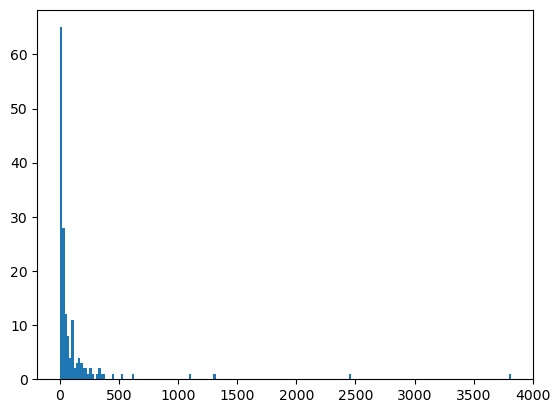

In [208]:
plt.hist(count_clones['Patient_ID'].to_list(), bins=200)

In [209]:
np.median(count_clones['Patient_ID'].to_list())

28.0

In [210]:
np.mean(count_clones['Patient_ID'].to_list())

123.31875

In [24]:
combined_maf_no_dupes_v2_formatted_on_trees.to_csv('RA_combined_maf_dedup_updated_on_trees_022025.maf',sep='\t',index=None)

In [25]:
combined_maf_no_dupes_v2_formatted_on_trees[combined_maf_no_dupes_v2_formatted_on_trees['Tumor_Sample_Barcode']=='2794_CL7']

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode


In [212]:
clones_25_in_2=['1002_CL1',
 '1002_CL2',
 '1002_CL3',
 '1002_CL4',
 '1002_CL5',
 '1002_CL6',
 '1002_CL7',
 '1002_CL8',
 '1002_CL9',
 '1002_CL10',
 '1002_CL11',
 '1002_CL12',
 '1002_CL13',
 '1002_CL14',
 '1002_CL15',
 '1002_CL16',
 '1598_CL1',
 '1598_CL2',
 '1598_CL3',
 '1598_CL4',
 '1598_CL5',
 '1598_CL6',
 '1078_CL1',
 '1078_CL2',
 '1078_CL3',
 '1045_CL1',
 '1045_CL2',
 '1045_CL3',
 '1045_CL4',
 '1045_CL5',
 '1045_CL6',
 '1045_CL7',
 '1045_CL8',
 '1045_CL11',
 '1113_CL1',
 '1113_CL2',
 '1113_CL3',
 '1113_CL4',
 '1326_CL1',
 '1326_CL2',
 '1326_CL3',
 '1326_CL4',
 '1326_CL5',
 '1326_CL6',
 '1644_CL1',
 '1644_CL2',
 '1644_CL3',
 '1644_CL4',
 '1644_CL5',
 '1644_CL9',
 '2819_CL1',
 '2819_CL2',
 '2819_CL3',
 '2819_CL4',
 '2819_CL5',
 '2819_CL6',
 '2389_CL1',
 '2389_CL2',
 '2389_CL3',
 '2389_CL4',
 '2389_CL5',
 '2389_CL6',
 '2389_CL7',
 '2389_CL8',
 '2389_CL11',
 '2974_CL1',
 '2974_CL2',
 '2974_CL3',
 '2974_CL4',
 '2974_CL5',
 '1035_CL1',
 '1035_CL2',
 '1035_CL3',
 '1035_CL4',
 '1035_CL5',
 '1035_CL6',
 '1534_CL1',
 '1547_CL1',
 '1547_CL2',
 '1547_CL3',
 '1547_CL4',
 '1547_CL5',
 '1547_CL6',
 '1547_CL9',
 '1558_CL1',
 '1558_CL2',
 '1558_CL3',
 '1558_CL4',
 '1558_CL5',
 '1558_CL6',
 '2542_CL1',
 '2542_CL2',
 '2542_CL3',
 '2542_CL4',
 '2542_CL5',
 '2542_CL6',
 '2542_CL7',
 '2542_CL8',
 '2542_CL9',
 '2542_CL10',
 '2542_CL11']

In [213]:
combined_maf_25_in_2 = combined_maf_no_dupes_v2_formatted_on_trees[combined_maf_no_dupes_v2_formatted_on_trees['Tumor_Sample_Barcode'].isin(clones_25_in_2)]
combined_maf_25_in_2


,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
0,1547,cfDNA_1995,NaN,DNMBP,10,101643817,C,G,199,42,...,1,NaN,NaN,0.93,0.84,1.00,1.00,1.00,1.00,1547_CL1
1,1547,cfDNA_1995,NaN,METTL10,10,126450946,G,A,157,12,...,2,NaN,NaN,0.60,0.34,0.88,0.61,0.56,0.66,1547_CL2
2,1547,cfDNA_1995,NaN,OPTN,10,13158279,G,C,436,76,...,1,NaN,NaN,0.93,0.84,1.00,1.00,1.00,1.00,1547_CL1
3,1547,cfDNA_1995,NaN,CUBN,10,17164886,G,C,191,75,...,1,NaN,NaN,0.97,0.93,1.00,1.00,1.00,1.00,1547_CL1
4,1547,cfDNA_1995,NaN,ARHGAP21,10,24889610,T,C,134,29,...,1,NaN,NaN,0.92,0.81,1.00,1.00,1.00,1.00,1547_CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19560,1002,17,NaN,ZZZ3,1,78098487,C,T,232,68,...,13,NaN,NaN,0.92,0.82,1.00,0.87,0.84,0.90,1002_CL13
19561,1002,17,NaN,RPAP2,1,92811400,C,G,61,10,...,13,NaN,NaN,0.66,0.41,0.95,0.87,0.84,0.90,1002_CL13
19568,1002,17,NaN,CACNB4,2,152955497,C,T,42,14,...,13,NaN,NaN,0.86,0.70,1.00,0.87,0.84,0.90,1002_CL13
19576,1002,17,NaN,CCDC170,6,151859193,G,C,152,48,...,13,NaN,NaN,0.92,0.82,1.00,0.87,0.84,0.90,1002_CL13


In [214]:
combined_maf_25_in_2[combined_maf_25_in_2['Hugo_Symbol']=='KMT2C']

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
3752,1558,RA_1558_cfDNA_3,NaN,KMT2C,7,151879322,G,A,79,33,...,1,NaN,NaN,0.89,0.76,1.00,1.00,0.99,1.00,1558_CL1
4109,1326,RP-1700_BWES00001_v1_Exome_OnPrem,NaN,KMT2C,7,151896451,T,A,36,13,...,2,NaN,NaN,0.80,0.57,1.00,0.98,0.96,1.00,1326_CL2
4751,2389,1,NaN,KMT2C,7,151882717,C,G,130,49,...,5,NaN,NaN,0.67,0.54,0.81,0.88,0.86,0.90,2389_CL5
4752,2389,1,NaN,KMT2C,7,151891593,G,A,101,46,...,5,NaN,NaN,0.77,0.62,0.92,0.88,0.86,0.90,2389_CL5
5577,2389,4,NaN,KMT2C,7,151851222,G,C,158,10,...,4,NaN,NaN,0.22,0.11,0.36,0.16,0.15,0.17,2389_CL4
6756,2389,8,NaN,KMT2C,7,151874161,C,A,152,1,...,7,NaN,NaN,0.38,0.01,0.82,0.03,0.02,0.03,2389_CL7
11666,2542,2542_2,NaN,KMT2C,7,151932951,C,T,357,53,...,2,NaN,NaN,0.81,0.63,1.00,0.94,0.91,0.98,2542_CL2


In [215]:
count_25_in_2clones = combined_maf_25_in_2.groupby('Tumor_Sample_Barcode').count()
count_25_in_2clones.sort_values(by=['Patient_ID']).head(30)

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Variant_Type,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high
Tumor_Sample_Barcode,,,,,,,,,,,,,,,,,,,,,
2542_CL5,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
1035_CL4,1,1,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
1326_CL3,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1547_CL4,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
2542_CL8,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1326_CL5,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1078_CL3,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1035_CL2,2,2,0,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
1035_CL3,4,4,0,4,4,4,4,4,4,4,...,4,4,0,0,4,4,4,4,4,4


(array([8., 1., 5., 1., 2., 6., 2., 5., 4., 2., 4., 1., 2., 1., 3., 2., 1.,
        0., 0., 1., 0., 3., 0., 1., 1., 0., 0., 2., 2., 1., 0., 2., 0., 1.,
        0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 2., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1.   ,   2.695,   4.39 ,   6.085,   7.78 ,   9.475,  11.17 ,
         12.865,  14.56 ,  16.2

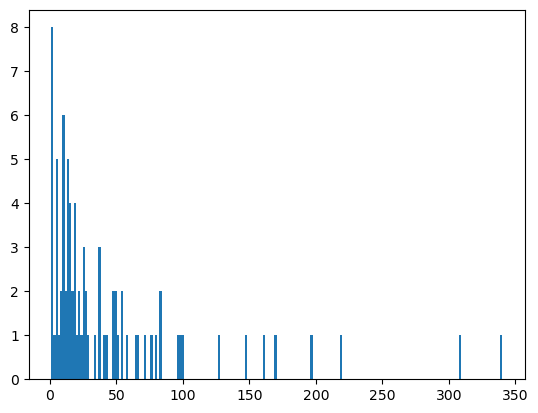

In [216]:
plt.hist(count_25_in_2clones['Patient_ID'].to_list(), bins=200)

In [217]:
np.median(count_25_in_2clones['Patient_ID'].to_list())

22.0

In [218]:
np.mean(count_25_in_2clones['Patient_ID'].to_list())

46.09756097560975

## >= 50 in one

In [219]:
clones_50_in_1 = ['1002_CL1',
 '1002_CL2',
 '1002_CL3',
 '1002_CL4',
 '1002_CL5',
 '1002_CL6',
 '1002_CL8',
 '1002_CL10',
 '1002_CL11',
 '1002_CL12',
 '1002_CL13',
 '1002_CL14',
 '1002_CL15',
 '1002_CL16',
 '1002_CL17',
 '1598_CL1',
 '1598_CL2',
 '1598_CL3',
 '1598_CL6',
 '1598_CL7',
 '1598_CL9',
 '1078_CL1',
 '1078_CL2',
 '1078_CL3',
 '1078_CL4',
 '1045_CL1',
 '1045_CL2',
 '1045_CL3',
 '1045_CL4',
 '1045_CL5',
 '1045_CL6',
 '1045_CL7',
 '1045_CL8',
 '1045_CL10',
 '1045_CL12',
 '1045_CL13',
 '1113_CL1',
 '1113_CL2',
 '1113_CL3',
 '1113_CL4',
 '1113_CL5',
 '1113_CL6',
 '1326_CL1',
 '1326_CL2',
 '1326_CL3',
 '1326_CL4',
 '1326_CL5',
 '1326_CL6',
 '1326_CL7',
 '1326_CL8',
 '1326_CL9',
 '1644_CL1',
 '1644_CL2',
 '1644_CL3',
 '1644_CL4',
 '1644_CL5',
 '1644_CL6',
 '2819_CL1',
 '2819_CL2',
 '2819_CL3',
 '2819_CL4',
 '2819_CL5',
 '2819_CL6',
 '2819_CL7',
 '2819_CL8',
 '2389_CL1',
 '2389_CL2',
 '2389_CL3',
 '2389_CL4',
 '2389_CL5',
 '2389_CL6',
 '2389_CL7',
 '2389_CL8',
 '2389_CL9',
 '2389_CL10',
 '2974_CL1',
 '2974_CL2',
 '2974_CL3',
 '2974_CL4',
 '2974_CL5',
 '1035_CL1',
 '1035_CL2',
 '1035_CL3',
 '1035_CL4',
 '1035_CL5',
 '1035_CL6',
 '1035_CL7',
 '1035_CL8',
 '1534_CL1',
 '1534_CL2',
 '1534_CL3',
 '1547_CL1',
 '1547_CL2',
 '1547_CL3',
 '1547_CL4',
 '1547_CL5',
 '1547_CL6',
 '1547_CL8',
 '1547_CL10',
 '1558_CL1',
 '1558_CL2',
 '1558_CL3',
 '1558_CL4',
 '1558_CL5',
 '1558_CL6',
 '1558_CL7',
 '1558_CL8',
 '1558_CL9',
 '2542_CL1',
 '2542_CL2',
 '2542_CL3',
 '2542_CL4',
 '2542_CL5',
 '2542_CL6',
 '2542_CL7',
 '2542_CL8',
 '2542_CL9',
 '2542_CL10',
 '2542_CL11',
 '2542_CL12',
 '2542_CL13',
 '2542_CL14',
 '2542_CL16',
 '2542_CL17']

In [220]:
combined_maf_50_in_1 = combined_maf_no_dupes_v2_formatted_on_trees[combined_maf_no_dupes_v2_formatted_on_trees['Tumor_Sample_Barcode'].isin(clones_50_in_1)]

count_50_in_1clones = combined_maf_50_in_1.groupby('Tumor_Sample_Barcode').count()



(array([60., 17.,  8.,  5.,  3.,  2.,  2.,  3.,  2.,  0.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e+00, 2.55300e+01, 5.00600e+01, 7.45900e+01, 9.91200e+01,
        1.23650e+02, 1.48180e+02, 1.72710e+02, 1.97240e+02, 2.21770e+02,
        2.46300e+02, 2.70830e+02, 2.95360e+02, 3.19890e+02, 3.44420e+02,
        3.68950e+02, 3.93480e+02, 4.18010e+02, 4.42540e+02, 4.67070e+02,
        4.91600e+02, 5.16130e+02, 5.40660e+02, 5.65190e+02, 5.89720e+02,
        6.14250e+02, 6.38780e+02, 6.63310e+02, 6.87840e+02, 7.12370e+

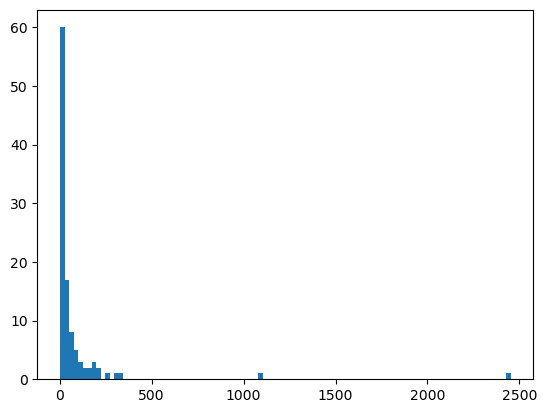

In [221]:
plt.hist(count_50_in_1clones['Patient_ID'].to_list(), bins=100)

In [222]:
combined_maf_50_in_1[combined_maf_50_in_1['Hugo_Symbol']=='KMT2C']

,Patient_ID,Sample_ID,Sample_Alias,Hugo_Symbol,Chromosome,Start_position,Reference_Allele,Tumor_Seq_Allele,t_ref_count,t_alt_count,...,Cluster_Assignment,Allelic_CN_minor,Allelic_CN_major,preDP_ccf_mean,preDP_ccf_CI_low,preDP_ccf_CI_high,clust_ccf_mean,clust_ccf_CI_low,clust_ccf_CI_high,Tumor_Sample_Barcode
3752,1558,RA_1558_cfDNA_3,NaN,KMT2C,7,151879322,G,A,79,33,...,1,NaN,NaN,0.89,0.76,1.00,1.00,0.99,1.00,1558_CL1
4109,1326,RP-1700_BWES00001_v1_Exome_OnPrem,NaN,KMT2C,7,151896451,T,A,36,13,...,2,NaN,NaN,0.80,0.57,1.00,0.98,0.96,1.00,1326_CL2
4253,1326,RP-1700_T01027-3_v4_Exome_OnPrem,NaN,KMT2C,7,151945382,C,-,246,64,...,9,NaN,NaN,0.87,0.74,1.00,0.83,0.77,0.89,1326_CL9
4751,2389,1,NaN,KMT2C,7,151882717,C,G,130,49,...,5,NaN,NaN,0.67,0.54,0.81,0.88,0.86,0.90,2389_CL5
4752,2389,1,NaN,KMT2C,7,151891593,G,A,101,46,...,5,NaN,NaN,0.77,0.62,0.92,0.88,0.86,0.90,2389_CL5
5577,2389,4,NaN,KMT2C,7,151851222,G,C,158,10,...,4,NaN,NaN,0.22,0.11,0.36,0.16,0.15,0.17,2389_CL4
6756,2389,8,NaN,KMT2C,7,151874161,C,A,152,1,...,7,NaN,NaN,0.38,0.01,0.82,0.03,0.02,0.03,2389_CL7
10467,2542,2542_1,NaN,KMT2C,7,151871322,C,A,133,25,...,12,NaN,NaN,0.83,0.64,1.00,0.86,0.86,0.86,2542_CL12
10468,2542,2542_1,NaN,KMT2C,7,151878785,G,A,185,42,...,12,NaN,NaN,0.88,0.75,1.00,0.86,0.86,0.86,2542_CL12
11666,2542,2542_2,NaN,KMT2C,7,151932951,C,T,357,53,...,2,NaN,NaN,0.81,0.63,1.00,0.94,0.91,0.98,2542_CL2
